/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


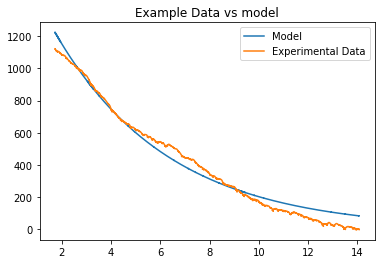

In [1]:
import openpyxl
import numpy as np 
from scipy.misc import derivative
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from openpyxl import load_workbook
# Give the location of the file
path1 = "./pullf_back1.xlsx"
wb = load_workbook(path1 , data_only = True)  # Work Book
ws = wb['pullf_back1']  # Work Sheet
pullf =ws['B']  # Column
path2 = "./pullx_back1.xlsx"
wb = load_workbook(path2 , data_only = True)  # Work Book
ws = wb['pullx_back1']  # Work Sheet
dist=ws['C']

dist = [dist[x].value for x in range(len(dist))]
pullf = [pullf[x].value for x in range(len(pullf))] 
pmf = []
for i in range(0,1):
    pmf.append(0)
for i in range(1, len(dist)):
    pmf.append((dist[i]-dist[i-1])*pullf[i] + pmf[i-1])
data=np.column_stack((dist , pmf))
xdata=np.round(data[:,0] , 5)
ydata=np.round(data[:,1] , 5)
#dy=np.diff(ydata)
#dx=np.diff(xdata)
#force=dy/dx
#Define Function

def func(x,b0,a0,c0,b1,a1,c1): #input x in nm and b in nm^-1 output W m^-2 nm" ,b2,a2,c2
    return a0*np.exp(-b0*x)+c0+ a1*np.exp(-b1*x)+c1 #+ a2*np.exp(-b2*x)+c2
#Define Constants
#a0 = 1000 # m^-2 nm^-1
#al = 300 # w m^-2 nm^-1
#Curve fit data to model
popt, pcov = curve_fit(func, xdata,ydata,bounds=(0,[2,2500,500,2,2500,500])) # bounds=(1.5,14) ,2,2500,500
perr = np.sqrt(np.diag(pcov))
#Evaluate and Plot Function
potential = func(xdata, popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])
plt.plot(xdata, potential, label="Model")
#Plot the Data
plt.figure(1,dpi=120)
plt.title("Example Data vs model")
plt.plot(xdata,ydata, label="Experimental Data")
plt.legend()
#workbook.close()
#plt.xlabel(rawdata[0][0])
#plt.ylabel(rawdata[0][1])
#plt.xlim(0,3)
#plt.ylim(0,2)
#plt.yscale("Linear")
#plt.xscale("Linear")

#int=np.trapz(ydata,xdata)
#data=np.array
#y=pmf(dist)
#print (column_list)

In [2]:
#numerical differentiation from model function
b0=popt[0]
a0=popt[1]
c0=popt[2]
b1=popt[3]
a1=popt[4]
c1=popt[5]
def energy(x): #input x in nm and b in nm^-1 output W m^-2 nm" ,b2,a2,c2
    return a0 *np.exp(-b0*x)+c0+ a1*np.exp(-b1*x)+c1 #+ a2*np.exp(-b2*x)+c2
force=-1*derivative(energy, xdata, dx=1e-5)

print(force)

[ 18.1882591   18.18889061  18.18861432 ... 265.07259129 265.08409575
 265.10710618]


In [3]:
#symbolic integration from model potential
import sympy as sym
import math

def f(x):
    return a0*sym.exp(-b0*x)+c0+ a1*sym.exp(-b1*x)+c1


x = sym.symbols('x')

def fprime(x):
    return sym.diff(f(x))

print(fprime(x)) #This works.

DerivativeOfF = sym.lambdify(x,fprime(x),"numpy")

force=-1*DerivativeOfF(xdata)
print(force)

-192.688964912149*exp(-0.21700170704155*x) - 192.688139148451*exp(-0.217000761083314*x)
[ 18.1882591   18.18889061  18.18861432 ... 265.07259128 265.08409574
 265.10710617]


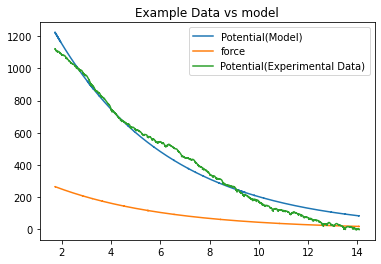

In [4]:
plt.plot(xdata, potential, label="Potential(Model)")
plt.plot(xdata, force, label="force")
#Plot the Data
plt.figure(1,dpi=120)
plt.title("Example Data vs model")
plt.plot(xdata,ydata, label="Potential(Experimental Data)")
plt.legend()

In [5]:
#exporting to excel by pandas
import pandas as pd
## convert your array into a dataframe
info=np.column_stack((dist,potential, force))
df1 = pd.DataFrame(info, columns=['Distance (nm)' , 'PMF(kJ/mol)' , 'force(kJ/mol/nm)'])
#potential = pd.DataFrame (potential)
#force= pd.DataFrame (force)
## save to xlsx file
filepath = 'pmf.xlsx'
df1.to_excel(filepath, sheet_name='PMF', index= False)
#df2 = pd.DataFrame(force),columns=['col 2'])
#df2.to_excel(filepath, sheet_name='potential', index = False)

/tmp/ipykernel_6738/2086331731.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
#exporting to excel by openpyxl
from openpyxl import workbook
#from openpyxl.cell import get_column_letter

workbook = Workbook() # the master workbook
#workbook.remove(workbook.active)
#workbook.create_sheet(title=potential)
output_file_name = "test.xlsx" # what "workbook" will be saved as

ws = workbook.active # all workbooks have one worksheet already selected as the default


ws.title = "potential"

potential=list(potential)
ws.append(potential)
#ws['A'] = potential #"=SUM(A1, A2)" # set up basic formula
#worksheet['B'] = force
wb.save(output_file_name)

NameError: name 'Workbook' is not defined